## Observations and Insights 

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_study_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Check the number of mice.
mice_count = len(mouse_study_complete_df["Mouse ID"].unique())
mice_count

249

In [4]:
# Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data 
# associated with that mouse ID (i.e., exclude that mouse from the analysis).
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_IDs = mouse_study_complete_df.loc[mouse_study_complete_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_IDs

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_study_complete_df.loc[mouse_study_complete_df["Mouse ID"] == "g989"]
duplicate_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_complete_df = mouse_study_complete_df[mouse_study_complete_df["Mouse ID"].isin(duplicate_mouse_IDs)==False]
clean_mouse_study_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Check the number of mice in the clean DataFrame.
clean_mice_count = len(clean_mouse_study_complete_df["Mouse ID"].unique())
clean_mice_count

248

## Summary Statistics

In [8]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volume = clean_mouse_study_complete_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_volume = clean_mouse_study_complete_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
std_tumor_volume = clean_mouse_study_complete_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
var_tumor_volume = clean_mouse_study_complete_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sem_tumor_volume = clean_mouse_study_complete_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_statistics_df = pd.DataFrame({"Tumor Volume (mm3) Mean": mean_tumor_volume,
                                      "Tumor Volume (mm3) Median": median_tumor_volume,
                                      "Tumor Volume (mm3) Standard Deviation": std_tumor_volume,
                                      "Tumor Volume (mm3) Variance": var_tumor_volume,
                                      "Tumor Volume (mm3) SEM": sem_tumor_volume})
summary_statistics_df

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) Variance,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [9]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)
summary2 = clean_mouse_study_complete_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

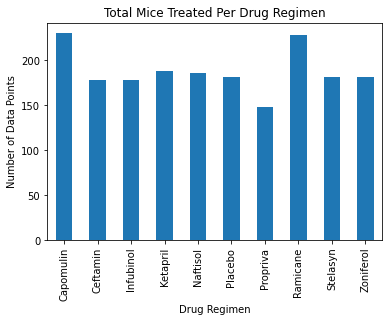

In [10]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
mice_per_drug = clean_mouse_study_complete_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

# Create a bar chart based off of the group series from before
mice_chart = mice_per_drug.plot(kind='bar')

# Set the xlabel and ylabel using class methods
mice_chart.set_xlabel("Drug Regimen")
mice_chart.set_ylabel("Number of Data Points")
plt.title("Total Mice Treated Per Drug Regimen")
plt.savefig("Images/BarTotalMice2.png")
plt.show()

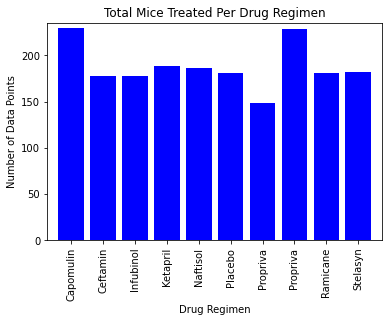

In [11]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
mice_count = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
drug_regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", 
         "Propriva", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
x_axis = np.arange(len(mice_count))
plt.bar(x_axis, mice_count, color = "b", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen, rotation="vertical")

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)
# Set the limits of the y axis
plt.ylim(0, max(mice_count)+5.0)

# Give the chart a title, x label, and y label
plt.title("Total Mice Treated Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.savefig("Images/BarTotalMice.png")
plt.show()

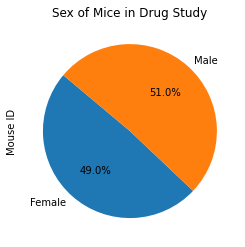

In [12]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
sex_of_mice = clean_mouse_study_complete_df.groupby(["Sex"]).count()["Mouse ID"]

# Create a bar chart based off of the group series from before
mice_sex_chart = sex_of_mice.plot(kind='pie', y=["Sex"], title=("Sex of Mice in Drug Study"), autopct="%1.1f%%", startangle=140)

# mice_chart.set.title("Total Mice Treated Per Drug Regimen")
plt.savefig("Images/PieMiceSex.png2.png")
plt.show()

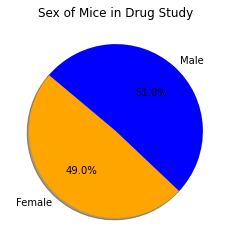

In [13]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
sex_of_mice = clean_mouse_study_complete_df.groupby(["Sex"]).count()
## Note: this plot will be identical to the one that uses Pyplot
# Labels for the sections of our pie chart
labels = ["Female", "Male"]
title = ["Sex of Mice in Drug Study"]

# The values of each section of the pie chart
sizes = [922, 958]

# The colors of each section of the pie chart
colors = ["orange", "blue"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sex of Mice in Drug Study")
plt.savefig("Images/PieMiceSex.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Start by getting the last (latest) timepoint for each mouse
mouse_ID_max_time = clean_mouse_study_complete_df.groupby(["Mouse ID"]).max()
mouse_ID_max_time = mouse_ID_max_time.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# one row for each mouse by this merge, merge on mouse id and time point                                                       
update_mouse_study_df = pd.merge(mouse_ID_max_time[["Mouse ID", "Timepoint"]], clean_mouse_study_complete_df, on=["Mouse ID", "Timepoint"], how="left")
update_mouse_study_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [15]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers for each drug treatment.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
tumor_vol_data = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
volume_list = []

for x in tumor_vol_data:
    volume_data = update_mouse_study_df.loc[update_mouse_study_df["Drug Regimen"] == x]["Tumor Volume (mm3)"]
    volume_list.append(volume_data)
    
    quartiles = volume_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = volume_data.loc[(volume_data < lower_bound) | (volume_data > upper_bound)]
    print(f"{x}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


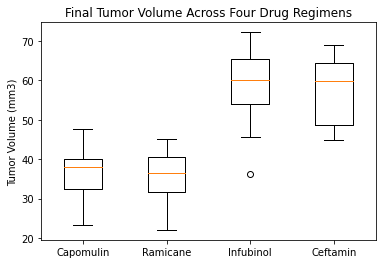

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(volume_list, labels = tumor_vol_data)
plt.title("Final Tumor Volume Across Four Drug Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("Images/FinalTumorVolume.png")
plt.show()

## Line and Scatter Plots

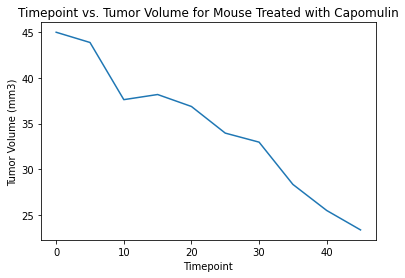

In [17]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
cap_df = clean_mouse_study_complete_df.loc[clean_mouse_study_complete_df["Drug Regimen"] == "Capomulin"]
cap_ID_df = cap_df.loc[cap_df["Mouse ID"] == "s185"]
plt.plot(cap_ID_df["Timepoint"], cap_ID_df["Tumor Volume (mm3)"])
plt.title("Timepoint vs. Tumor Volume for Mouse Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("Images/FinalTumorVolumeCapomulin.png")
plt.show()

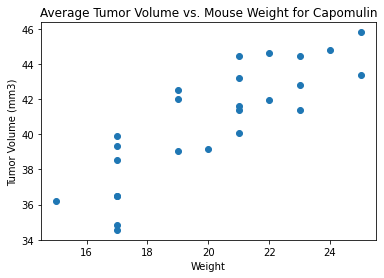

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
cap_TW_aver_df = cap_df.groupby("Mouse ID").mean()
x_values = cap_TW_aver_df["Weight (g)"]
y_values = cap_TW_aver_df["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values)


plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("Images/FinalTumorVolume&WeightCapomuline.png")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomuline regimen is 0.84


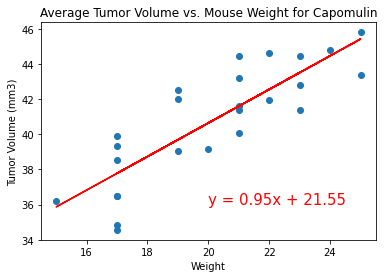

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
cap_TW_aver_df = cap_df.groupby("Mouse ID").mean()
x_values = cap_TW_aver_df["Weight (g)"]
y_values = cap_TW_aver_df["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values)

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
weight = cap_TW_aver_df.iloc[:,1]
tumor = cap_TW_aver_df.iloc[:,3]
correlation = st.pearsonr(weight,tumor)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomuline regimen is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("Images/FinalTumorVolume&WeightCapomulineRegression.png")
plt.show()